In [1]:
!pip install -q yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

### Ações

In [3]:
def fix_col_names(df):
  return ['IBOV' if col =='^BVSP' else col.rstrip('.SA') for col in df.columns]

In [4]:
tickers = ['PETR4.SA','VALE3.SA','ITUB4.SA','ITSA4.SA','WEGE3.SA','TAEE11.SA']
prices = yf.download(tickers, start='2015-01-01')['Adj Close']
prices.columns = fix_col_names(prices)
prices.dropna(inplace=True)

[*********************100%***********************]  6 of 6 completed


In [5]:
retorno = np.log(prices / prices.shift(1)).dropna()

In [6]:
retorno.head()

,ITSA4,ITUB4,PETR4,TAEE11,VALE3,WEGE3
Date,,,,,,
2015-01-05,0.003267,0.005012,-0.089345,-0.003721,-0.015152,0.006796
2015-01-06,0.007580,0.016047,-0.033257,0.001596,0.039294,-0.014945
2015-01-07,0.037061,0.035540,0.046026,0.001594,0.036040,-0.011523
2015-01-08,0.010341,0.015521,0.062590,0.009509,0.010564,0.016746
2015-01-09,-0.035605,-0.044715,0.029885,-0.006859,-0.021687,-0.004569


### Gráficos dos Preços de Fechamento

In [8]:
fig = go.Figure()

for col in prices.columns:
  fig.add_scatter(x=prices.index, y=prices[col], name=col)

fig.layout.title ='Preços de Fechamento Ajustado'
fig.layout.xaxis.title = 'Data'
fig.layout.yaxis.title = 'Preço (R$)'

fig.show()

In [9]:
norm_prices = 100 * prices / prices.iloc[0]

In [10]:
norm_prices.head()

,ITSA4,ITUB4,PETR4,TAEE11,VALE3,WEGE3
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,100.327186,100.502448,91.452975,99.628630,98.496233,100.681868
2015-01-06,101.090506,102.128208,88.461531,99.787785,102.443615,99.188326
2015-01-07,104.907305,105.823155,92.628232,99.946928,106.203008,98.051975
2015-01-08,105.997831,107.478493,98.611120,100.901860,107.330838,99.707800


In [11]:
fig = go.Figure()

for col in norm_prices.columns:
  fig.add_scatter(x=norm_prices.index, y=norm_prices[col], name=col)

fig.layout.title ='Preços base 100'
fig.layout.xaxis.title = 'Data'

fig.show()

In [13]:
# Qual o retorno percentual de cada ativo ao fim do perído?
norm_prices.iloc[-1] - 100

ITSA4     166.799714
ITUB4     123.035831
PETR4     760.297814
TAEE11    368.319099
VALE3     431.460645
WEGE3     638.663081
Name: 2023-06-16 00:00:00, dtype: float64

### Correlação

In [14]:
retorno.corr()

,ITSA4,ITUB4,PETR4,TAEE11,VALE3,WEGE3
ITSA4,1.000000,0.912419,0.567489,0.380102,0.327367,0.392825
ITUB4,0.912419,1.000000,0.561088,0.341703,0.339411,0.358577
PETR4,0.567489,0.561088,1.000000,0.306218,0.453228,0.325307
TAEE11,0.380102,0.341703,0.306218,1.000000,0.181439,0.280839
VALE3,0.327367,0.339411,0.453228,0.181439,1.000000,0.221525
WEGE3,0.392825,0.358577,0.325307,0.280839,0.221525,1.000000


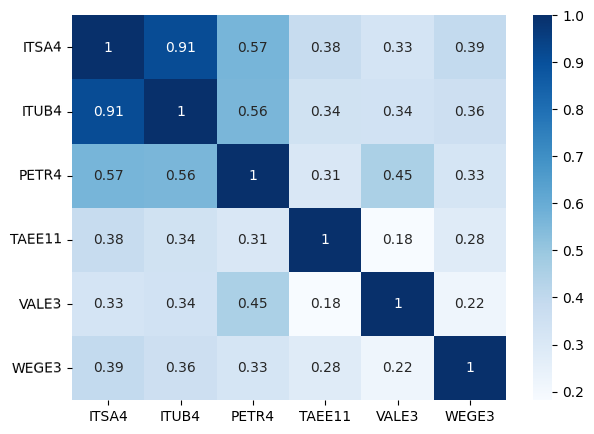

In [15]:
plt.figure(figsize=(7,5))
sns.heatmap(retorno.corr(), annot=True, cmap='Blues');
plt.tick_params(axis='y', labelrotation=0.9)